# **CNN for 10 types of Images**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train = Y_train.reshape(-1,)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

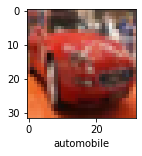

In [9]:
plot_sample(X_train,Y_train,5)

In [5]:
#Normalization before Model Building
X_train = (X_train/255)
X_test = (X_test/255)

# Model Building - CNN with maxpooling and relu

In [6]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters= 50,input_shape=(32,32,3),kernel_size=(3,3),activation=tf.nn.relu))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Conv2D(filters= 25,input_shape=(32,32,3),kernel_size=(3,3),activation=tf.nn.relu))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dropout(0.20))
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
optim = tf.keras.optimizers.Adam(lr=0.001, decay=0.00001)
model1.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model1.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8160 - accuracy: 0.3292
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3374 - accuracy: 0.5205
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2080 - accuracy: 0.5707
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1383 - accuracy: 0.5975
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0613 - accuracy: 0.6259


In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 25)        11275     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 25)          0         
_________________________________________________________________
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                57664     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

# Data augmentation for generalizing and to prevent overfitting

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 10,zoom_range = 0.1)
iterator = datagen.flow(X_train,Y_train,batch_size=1563)
model1.fit(iterator,steps_per_epoch=5)

# Model Evaluation

In [11]:

model1.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0048 - accuracy: 0.6438


[1.0048190355300903, 0.6438000202178955]

In [14]:
#Augmented Data
model1.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0000 - accuracy: 0.6541


[0.99997478723526, 0.6541000008583069]

conversion of activation function values to class values using argmax

In [23]:
Y_pred = model1.predict(X_test)

In [27]:
Y_pred_classes = np.argmax(Y_pred,axis=1)

In [28]:
Y_pred_classes[5]

6

# classification report

In [29]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(Y_test, Y_pred_classes))
print('Classification Report:\n', classification_report(Y_test, Y_pred_classes))

Accuracy: 0.6541
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68      1000
           1       0.80      0.77      0.79      1000
           2       0.54      0.51      0.52      1000
           3       0.47      0.43      0.45      1000
           4       0.56      0.64      0.59      1000
           5       0.53      0.61      0.57      1000
           6       0.84      0.62      0.71      1000
           7       0.65      0.77      0.70      1000
           8       0.76      0.79      0.78      1000
           9       0.76      0.75      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

